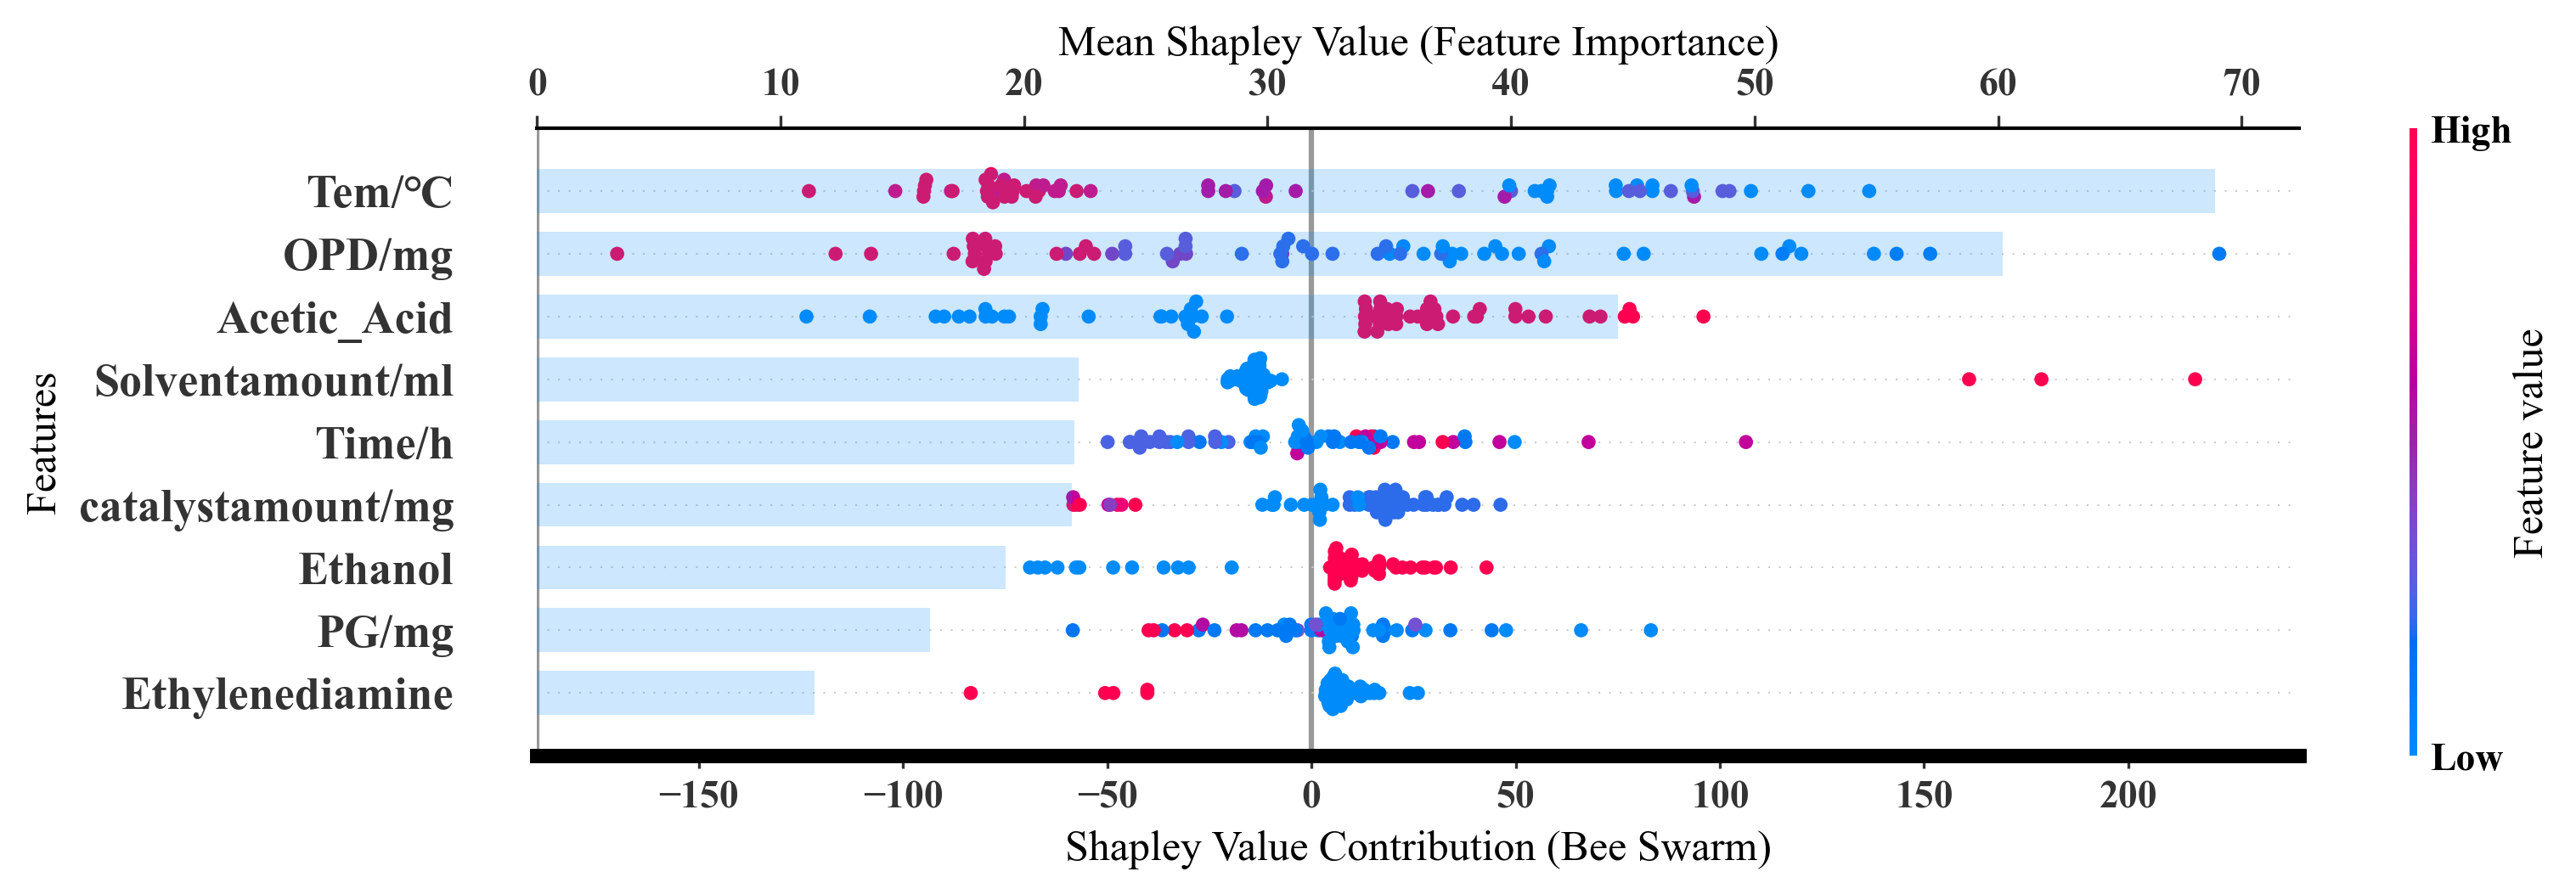

In [29]:
import shap
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(16.18, 10), dpi=300)


plt.sca(ax1)
shap.summary_plot(
    shap_values, X_train_stand,
    feature_names=X.columns,
    max_display=9,
    plot_type="dot",
    show=False
)


scatter = ax1.collections[0]


for i in range(len(scatter.get_offsets())):
    scatter.set_sizes([100])  

ax1.set_position([0.2, 0.2, 0.65, 0.65])


ax2 = ax1.twiny()
plt.sca(ax2)
shap.summary_plot(
    shap_values, X_train_stand,
    feature_names=X.columns,
    max_display=9,
    plot_type="bar",
    show=False
)
ax2.set_position([0.2, 0.2, 0.65, 0.65])


y_line = len(X.columns) - 0.5  
ax2.axhline(y=y_line, color='gray', linestyle='-', linewidth=1, zorder=5)


for bar in ax2.patches:
    bar.set_alpha(0.2)


ax2.xaxis.set_label_position('top')
ax2.xaxis.tick_top()
ax2.spines['top'].set_visible(True)
ax2.spines['top'].set_linewidth(1.0)
ax2.spines['top'].set_color('black')


ax1.set_xlabel('Shapley Value Contribution (Bee Swarm)', fontsize=12)
ax1.set_ylabel('Features', fontsize=12)
ax2.set_xlabel('Mean Shapley Value (Feature Importance)', fontsize=12)
fig.set_size_inches(12, 3)
plt.tight_layout()


plt.gca().figure.savefig("Final.png", dpi=1000, bbox_inches='tight')


plt.show()


plt.close()


In [9]:
import shap
import matplotlib.pyplot as plt

# SHAP 分析
explainer = shap.TreeExplainer(rf_regressor)
shap_values = explainer.shap_values(X_train_stand)

# 定义一个绘制并保存 SHAP 图像的函数
def save_shap_plot(shap_values, X_data, plot_type, feature_names, filename, max_display=10):
    """
    绘制 SHAP 图并保存图像。
    
    :param shap_values: SHAP 值
    :param X_data: 特征数据 (numpy.ndarray)
    :param feature_names: 特征名称 (list)
    :param plot_type: 图类型，'dot' 或 'bar'
    :param filename: 保存图像的文件名
    :param max_display: 显示的最大特征数量
    """
    plt.figure()  # 创建新的绘图窗口
    shap.summary_plot(shap_values, X_data, plot_type=plot_type, feature_names=feature_names, max_display=max_display, show=False)
    plt.gca().figure.savefig(filename, dpi=1000, bbox_inches='tight')
    plt.close()

# 绘制并保存 SHAP summary plot，并设置字体加粗
plt.figure()  # 创建新的绘图窗口
shap.summary_plot(shap_values, X_train_stand, feature_names=X.columns, max_display=10, show=False)

# 获取当前坐标轴对象
ax = plt.gca()

# 设置字体加粗
ax.set_xlabel(ax.get_xlabel(), weight='bold')  # X轴标签加粗
ax.set_ylabel(ax.get_ylabel(), weight='bold')  # Y轴标签加粗

# 设置标题
ax.set_title('SHAP Summary Plot', weight='bold', fontsize=16)  # 设置标题字体加粗

# 保存 SHAP summary plot
plt.savefig("shap_summary_plot_customized.png", dpi=1000, bbox_inches='tight')
plt.close()

# 使用 save_shap_plot 函数绘制并保存 SHAP summary plot 和 SHAP bar plot
save_shap_plot(shap_values, X_train_stand, feature_names=X.columns, plot_type='dot', filename='shap_summary_plot.png')
save_shap_plot(shap_values, X_train_stand, feature_names=X.columns, plot_type='bar', filename='shap_bar_plot.png')
